<a href="https://colab.research.google.com/github/Robert-Gomez-AI/HeartFailure/blob/main/M3U4_fase_3_Entendimiento_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1rSrsZ04aJ_D3BC67Cy2dBUZ6tmguydNf" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento y carga de los datos**
---

Este notebook es una plantilla que le puede servir como guía para el tercer entregable del proyecto aplicado.

In [46]:
# Cargamos los datos
import requests as re
import pandas as pd
#Librerias nlp

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import seaborn as sns



In [47]:
url= "https://datasets-server.huggingface.co/rows?dataset=dair-ai%2Femotion&config=split&split=train&offset=0&length=100"
def get_data(url):
  get= re.get(url)
  dict_df=dict(get.json())
  data=[row["row"] for row in dict_df["rows"]]
  df = pd.DataFrame(data)
  return df



# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
def generar_frecuencias(df, columna_texto):
    """
    Genera el conteo de frecuencias de palabras de un DataFrame con una columna de texto.

    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene los textos.
    columna_texto (str): Nombre de la columna que contiene los textos.

    Retorna:
    Counter: Conteo de frecuencias de palabras procesadas.
    """
    # Lista de textos de ejemplo
    textos = df[columna_texto]

    # Concatenar todos los textos en uno solo
    texto_concatenado = " ".join(textos)

    # Tokenización
    tokens = word_tokenize(texto_concatenado.lower())

    # Eliminación de puntuación
    tokens = [word for word in tokens if word.isalnum()]

    # Eliminación de stopwords
    stop_words = set(stopwords.words('english'))
    tokens_limpios = [word for word in tokens if word not in stop_words]

    # Conteo de frecuencias
    frecuencias = Counter(tokens_limpios)

    return frecuencias

In [60]:
def crear_barplot(frecuencias,sentimiento, top_n=10):
    """
    Crea un histograma vertical de las palabras más comunes basado en las frecuencias proporcionadas.

    Parámetros:
    frecuencias (Counter): Conteo de frecuencias de palabras.
    top_n (int): Número de palabras más comunes a mostrar en el histograma.
    """
    # Obtener las palabras más comunes
    palabras, counts = zip(*frecuencias.most_common(top_n))

    # Configurar el estilo de seaborn
    sns.set(style="whitegrid")

    # Crear el plot
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')

    # Añadir títulos y etiquetas
    barplot.set_title('Histograma de Frecuencia de Palabras para {}'.format(sentimiento), fontsize=16)
    barplot.set_xlabel('Frecuencia', fontsize=14)
    barplot.set_ylabel('Palabras', fontsize=14)

    # Añadir etiquetas de valor en las barras
    for p in barplot.patches:
        barplot.annotate(format(p.get_width(), '.1f'),
                         (p.get_width(), p.get_y() + p.get_height() / 2.),
                         ha = 'center', va = 'center',
                         xytext = (10, 0),
                         textcoords = 'offset points', fontsize=12)

    # Mostrar el gráfico
    plt.show()

In [66]:
def crear_wordcloud(frecuencias):
    """
    Crea y muestra una nube de palabras basada en las frecuencias proporcionadas.

    Parámetros:
    frecuencias (Counter): Conteo de frecuencias de palabras.
    """
    # Crear la wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencias)

    # Mostrar la wordcloud usando matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nube de Palabras")
    plt.show()


In [51]:
df=get_data(url)

In [52]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
95,i feel like throwing away the shitty piece of ...,0
96,im starting to feel wryly amused at the banal ...,1
97,i find every body beautiful and only want peop...,1
98,i hear are owners who feel victimized by their...,0


In [54]:
feelings=['sadness','joy','love','anger','fear','surprise']



## **1. Análisis Exploratorio de los Datos**
---

Describa la estructura y la naturaleza de los datos antes de comenzar con el análisis en profundidad.




### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el *dataset*?
- ¿En qué formato están guardados los datos?
- ¿Qué tamaño en MB tiene el conjunto?

Claro, aquí tienes el texto en un formato que puedes copiar fácilmente:

---

Los datos corresponden a un dataset extraído de [Hugging Face](https://huggingface.co/datasets/dair-ai/emotion), donde el dataset contiene una colección de tweets y una clasificación del sentimiento central en cada uno.

- **Fuente del Dataset**: Hugging Face es una plataforma conocida por su amplio repositorio de datasets y modelos de machine learning. El dataset en cuestión se encuentra disponible [aquí](https://huggingface.co/datasets/dair-ai/emotion).
- **Contenido del Dataset**: Este dataset se compone de una colección de tweets. Cada tweet está etiquetado con un sentimiento central, lo que facilita su uso en tareas de análisis de sentimientos y procesamiento del lenguaje natural.
- **Estructura del Documento**: El dataset se presenta en un único documento.
- **Formato de Solicitud**: Al realizar la solicitud, el dataset se retorna en formato JSON.
- **Transformación a DataFrame**: El JSON obtenido se transforma posteriormente en un DataFrame de pandas para facilitar el análisis y manipulación de los datos.
- **Tamaño del Conjunto de Datos**: El conjunto de datos tiene un tamaño de aproximadamente 15 MB, lo cual es manejable para la mayoría de las aplicaciones de análisis de datos.
- **Número de Entradas**: El dataset contiene 100 entradas, cada una correspondiente a un tweet y su clasificación de sentimiento.
- **Etiquetas**: Las etiquetas corresponden a los siguientes sentimientos:
  1. Tristeza
  2. Alegría o jubilo
  3. Amor
  4. Enojo o ira
  5. Miedo
  6. Sorpresa

Este dataset es ideal para proyectos que requieren análisis de sentimientos, aprendizaje supervisado en NLP, y otros experimentos relacionados con el procesamiento de texto.

---

Puedes copiar y pegar este texto según lo necesites.


### **1.2. Exploración Preliminar**
---



#### ¿Cuál es la naturaleza de los datos que se van a analizar en el proyecto?

- **Naturaleza de los Datos**: Los datos que se analizarán en este proyecto son datos de texto, extraídos de una colección de tweets. La naturaleza del análisis de datos de texto puede diferir significativamente del análisis de datos estructurados debido a la necesidad de técnicas especializadas en procesamiento del lenguaje natural (NLP). Nos enfocaremos en dos aspectos principales:
  - **Conteos de Frecuencias**: Este análisis implica contar la frecuencia de palabras o frases específicas en el conjunto de datos. Ayuda a identificar las palabras más comunes, los temas predominantes, y otras tendencias lingüísticas en los tweets.
  - **Análisis de Distribución de Sentimientos**: Utilizaremos herramientas de análisis de sentimientos para clasificar y analizar las emociones expresadas en los tweets. Esto incluye la identificación de sentimientos positivos, negativos y neutros, y la evaluación de cómo se distribuyen estos sentimientos a lo largo del dataset.



#### ¿Qué tipos de variables y características están presentes en el conjunto de datos?

- **Variables y Características del Conjunto de Datos**: El dataset incluye las siguientes variables clave:

| Variable | Tipo de Dato |
|----------|--------------|
| `text`   | `String`     |
| `label`  | `Int`        |

- **Descripción de las Variables**:
  - **`text`**: Esta variable contiene el contenido textual de cada tweet. Es de tipo `String` y representa la entrada principal para el análisis de texto y sentimiento. Cada entrada en esta columna es un tweet individual que será analizado para extraer información útil y patrones de lenguaje.
  - **`label`**: Esta variable es de tipo `Int` y contiene la clasificación del sentimiento correspondiente a cada tweet. Los valores enteros representan diferentes sentimientos, facilitando el análisis cuantitativo de las emociones expresadas en los tweets.

Este proyecto se centrará en aplicar técnicas de procesamiento de texto para entender mejor los datos y extraer insights valiosos sobre los sentimientos expresados en los tweets, para posteriormente almacenarlos y tener no sólo guardados los mensajes sino también un sentimiento asociado.


---**INGRESE SU RESPUESTA**---

## **2. Análisis Descriptivo de los Datos**
---

Profundice en el análisis de los datos, proporcionando una descripción detallada y estadísticas clave.

### **2.1. Conteos de frecuencias y nubes de palabras**
---

En el análisis de datos de texto, el conteo de frecuencias es una técnica fundamental que nos permite identificar y cuantificar las palabras más comunes dentro de un conjunto de datos. Este enfoque es crucial para comprender mejor el contenido y las tendencias lingüísticas presentes en una colección de tweets. En nuestro proyecto, utilizaremos el conteo de frecuencias para descubrir los términos y frases que aparecen con mayor frecuencia en los tweets, proporcionando una visión general de los temas predominantes y las palabras clave más relevantes.
Enfoque del Análisis

Nuestro análisis se desarrollará en dos etapas principales: un análisis general de todo el conjunto de datos y un análisis detallado basado en los sentimientos etiquetados en los tweets.
1. Análisis General

En la primera etapa, realizaremos un conteo de frecuencias global que incluirá todos los tweets del dataset. Este análisis inicial nos permitirá identificar las palabras más comunes sin distinción de sentimiento. Al procesar el texto de manera integral, podremos observar patrones generales y tendencias lingüísticas que son universales en el conjunto de datos. Este paso nos ayudará a establecer una línea base para el análisis más detallado que sigue.
2. Análisis por Sentimiento

Después de obtener una visión general, procederemos con un análisis específico para cada sentimiento etiquetado en los tweets. Los tweets en nuestro dataset están clasificados en diferentes categorías de sentimientos, cada una representada por un valor entero en la variable label. Las categorías de sentimientos incluyen tristeza, alegría o júbilo, enojo o ira, miedo y sorpresa. Al analizar el conteo de frecuencias dentro de cada categoría de sentimiento, podremos:

  - Identificar las palabras y frases que son más representativas de cada sentimiento.
  - Comparar las diferencias lingüísticas entre los distintos sentimientos.
  - Obtener insights más profundos sobre cómo se expresan emocionalmente los usuarios en Twitter.



### **2.1.1 Conteos de frecuencias general**

Primeramente haremos un conteo general de las palabras viendo que palabras son las más comunes e interpretando resultados a partir de ahí.

In [70]:
frecuencias_general=generar_frecuencias(df,'text')

<ipython-input-60-c91988fb2cc4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')


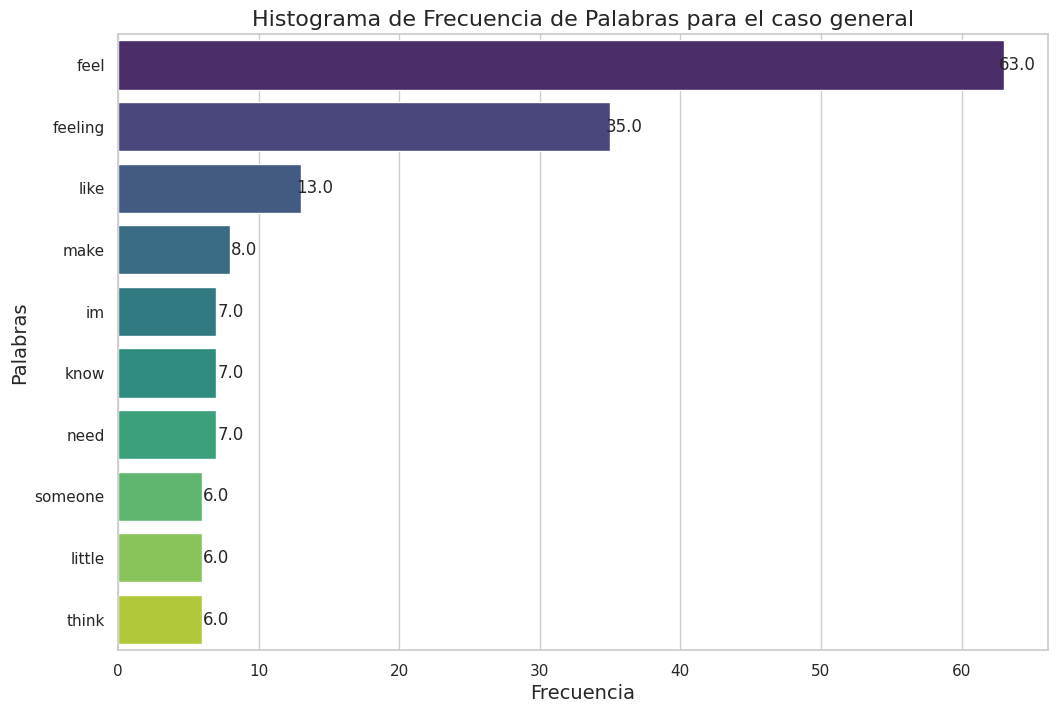

In [62]:
crear_barplot(frecuencias_general,'el caso general')

Podemos observar que "feel" y "feeling" están muy implicados, al igual que la palabra "Im" esto nos habla de que en general se hablan de sensaciones y sentimientos en twitter más que de pensamientos o razonamientos objetivos.

Podemos observar esto de mejor manera revisando la nube de palabras.

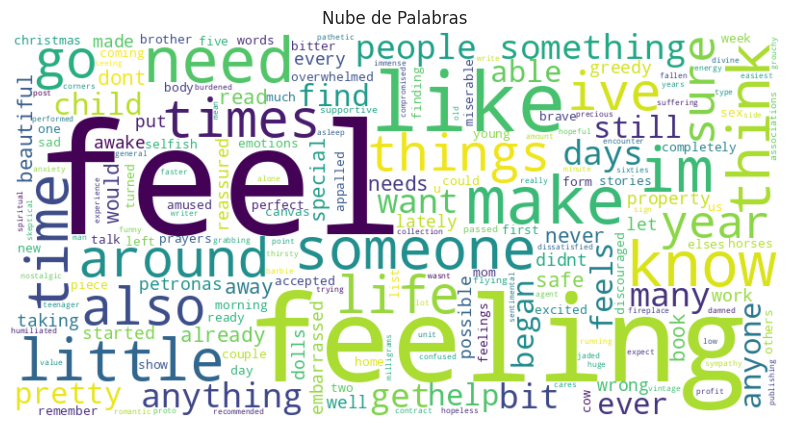

In [67]:
crear_wordcloud(frecuencias_general)

**2.1.2 Conteos de frecuencias por sentimiento**

#### **Tristeza**

In [71]:
frecuencias=[generar_frecuencias(df[df['label']==i],'text') for i in range(6)]

<ipython-input-60-c91988fb2cc4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')


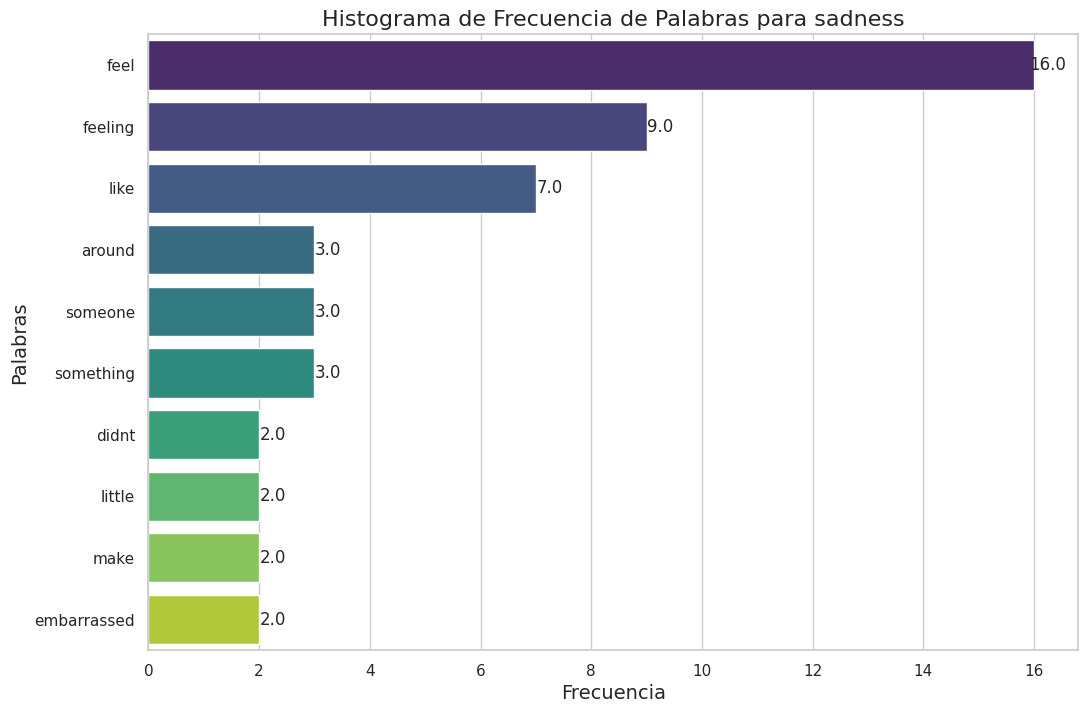

In [73]:
crear_barplot(frecuencias[0],'tristeza')

Podemos observar que es muy similar al caso general, sin embargo en este caos de tristeza se ven involucradas palabras cómo algo o alguien, también verguenza, por lo que vemos que la tristeza en los tweets están asociados más a terceros y a lo que pasa respecto a ellos.

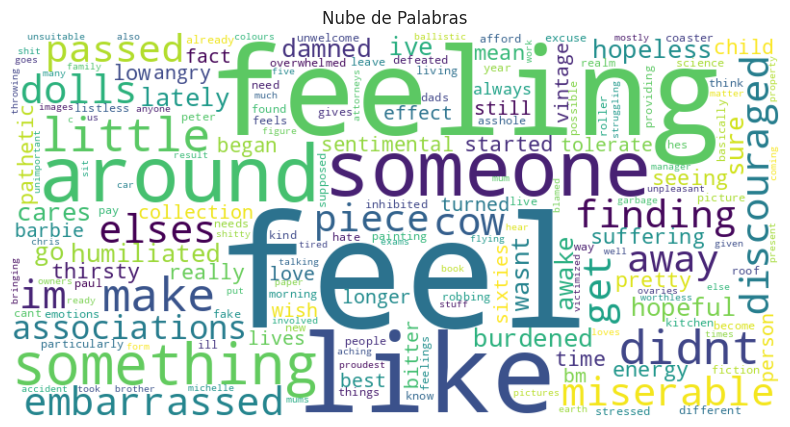

In [75]:
crear_wordcloud(frecuencias[0])

#### **Alegria**

<ipython-input-60-c91988fb2cc4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')


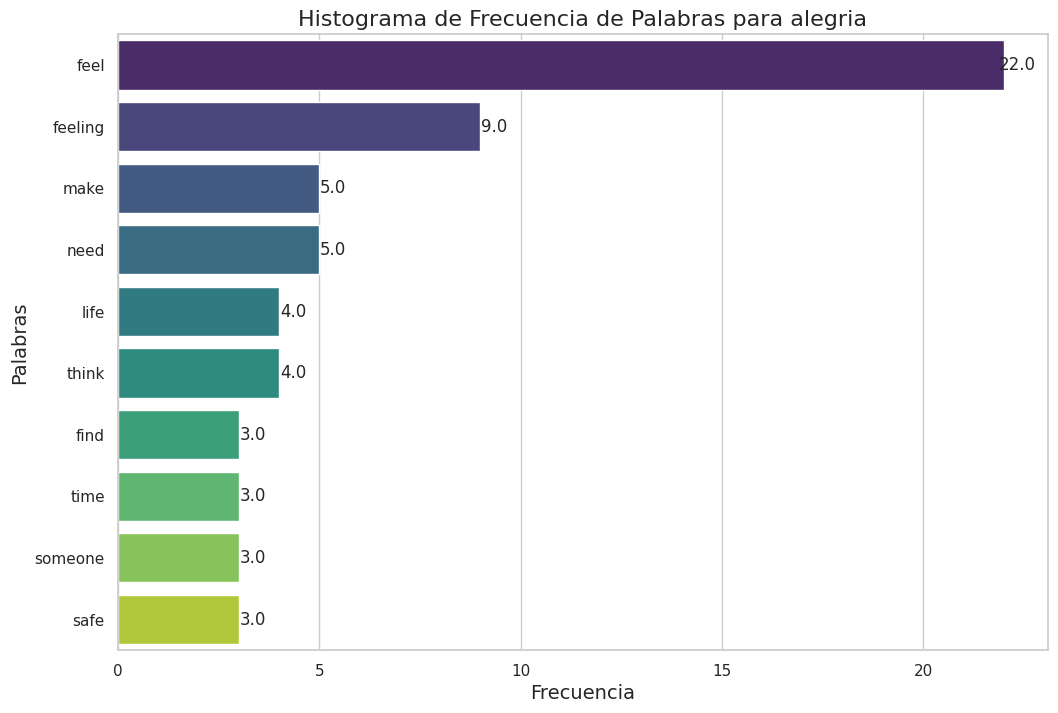

In [79]:
crear_barplot(frecuencias[1],'alegria')

POdemos observar que aquí entran en juego cosas cómo el hacer, las necesidades, la vida, el pensamiento  y el tiempo. Podemos observar que no es tan claro el tema de la alegría o el jubilo pues puede provenir de multiples lados, pero el hacer y el pensar tienen un papel central, al menos en cuanto a las palabras que más se usan.

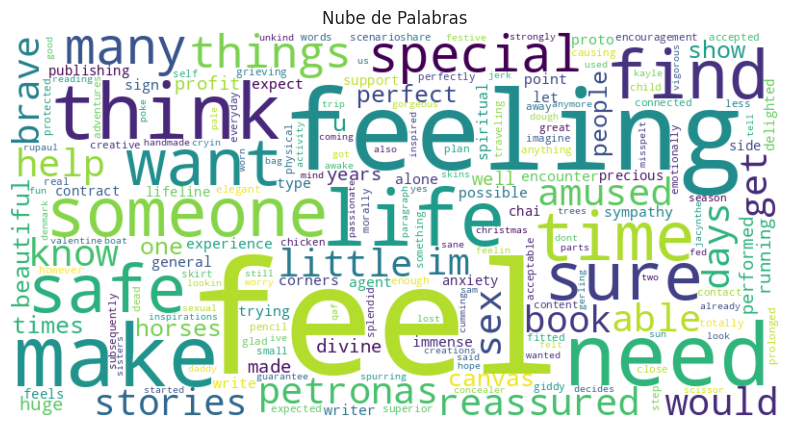

In [80]:
crear_wordcloud(frecuencias[1])

<ipython-input-60-c91988fb2cc4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')


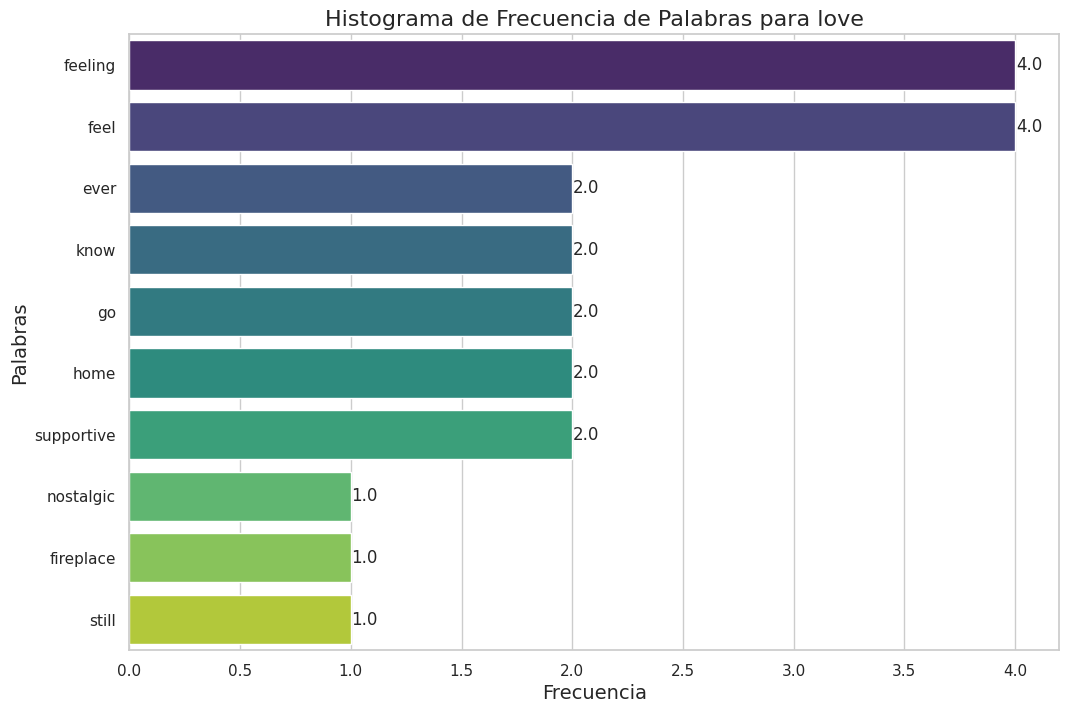

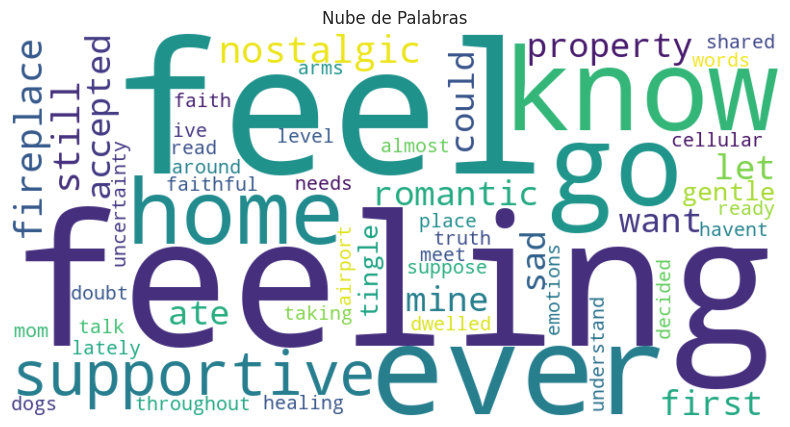

<ipython-input-60-c91988fb2cc4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')


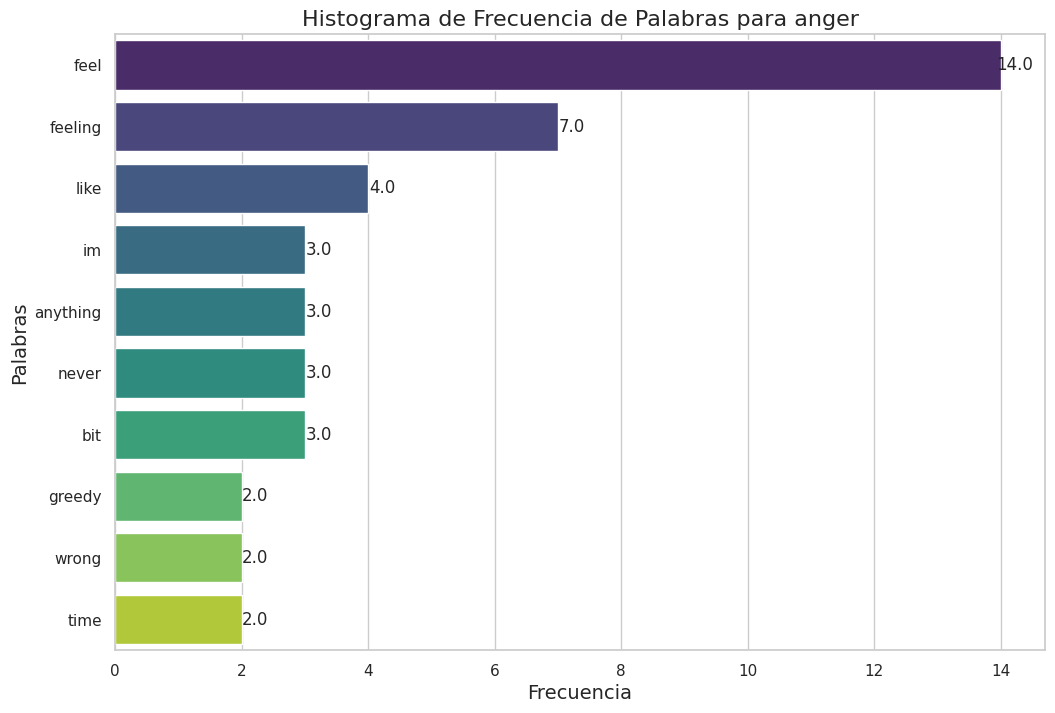

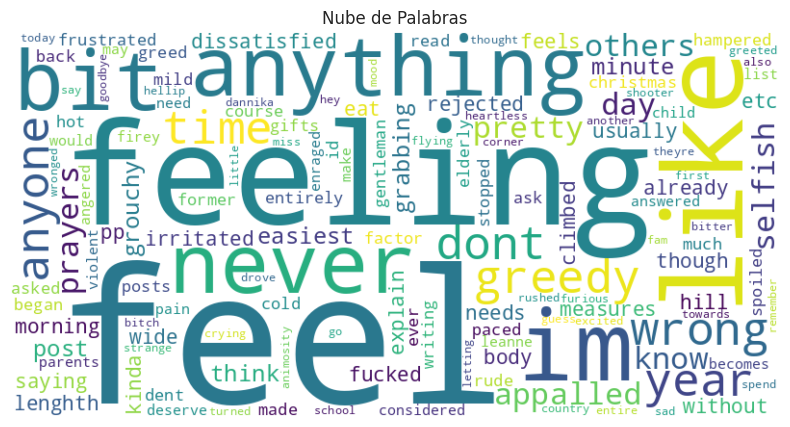

<ipython-input-60-c91988fb2cc4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')


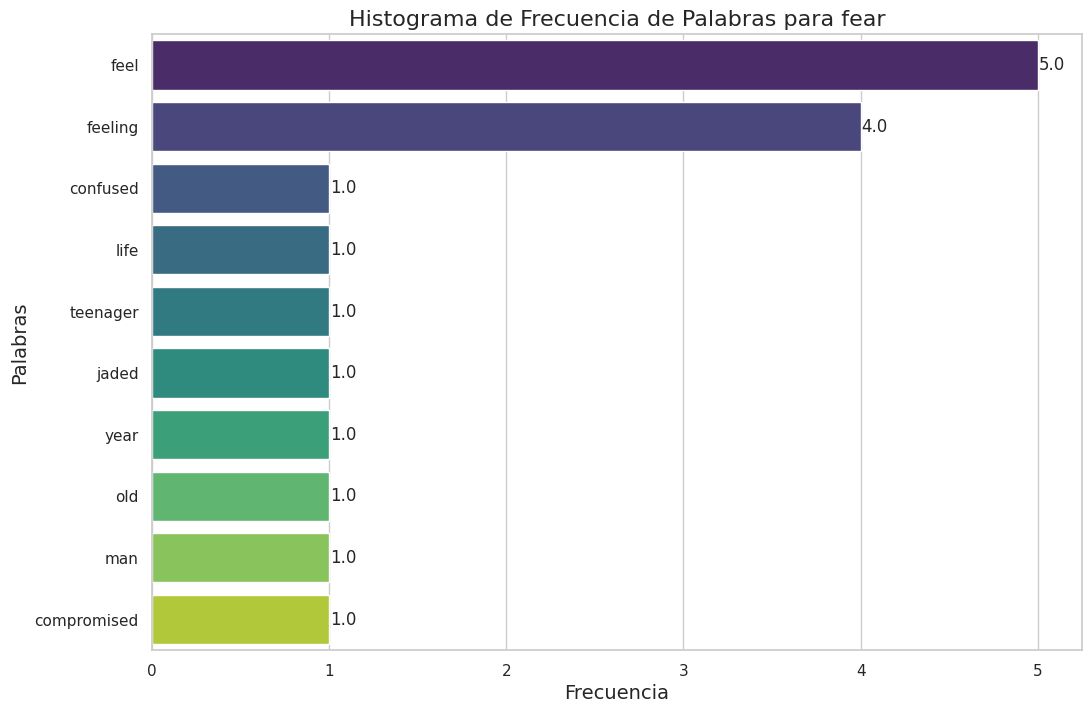

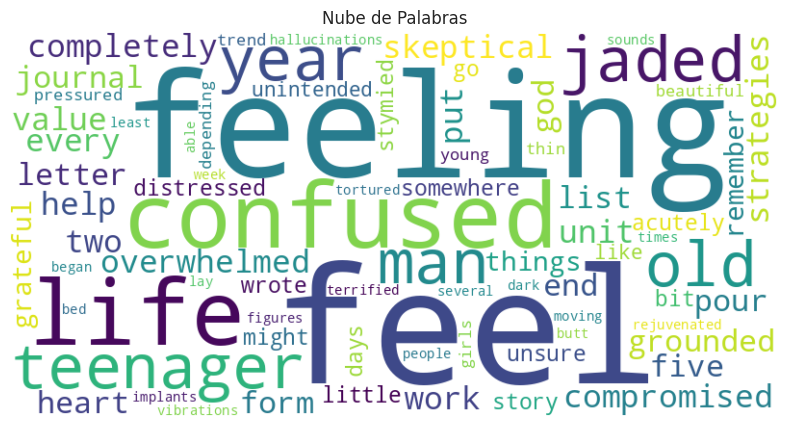

<ipython-input-60-c91988fb2cc4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=list(palabras), x=list(counts), palette='viridis', orient='h')


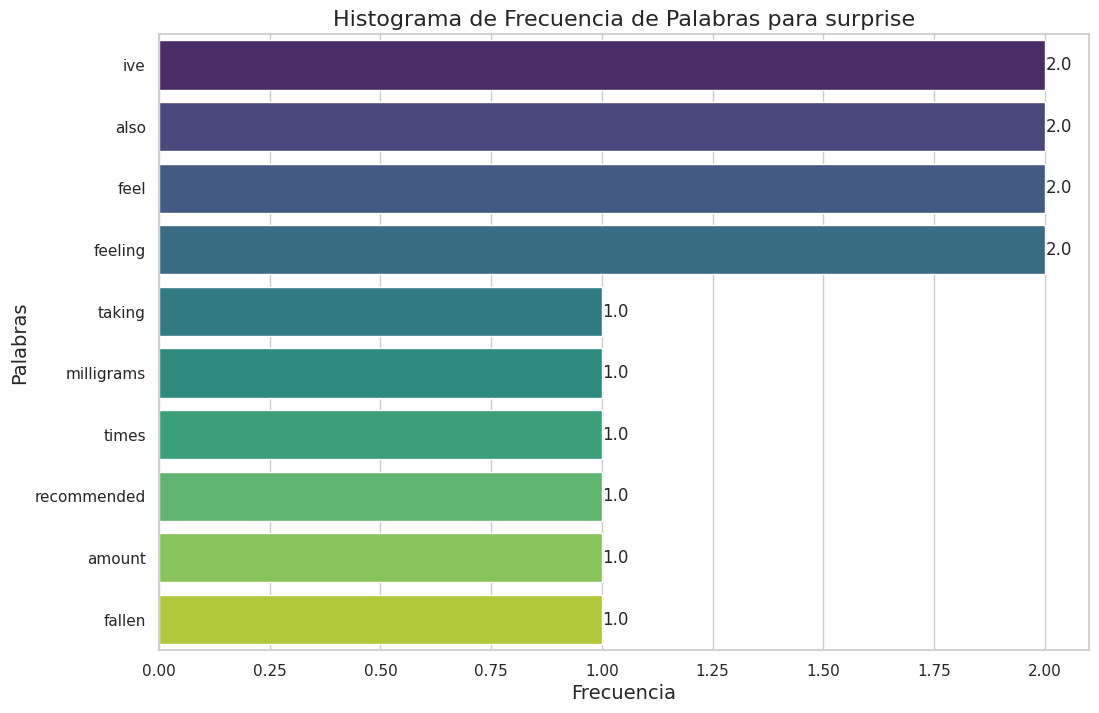

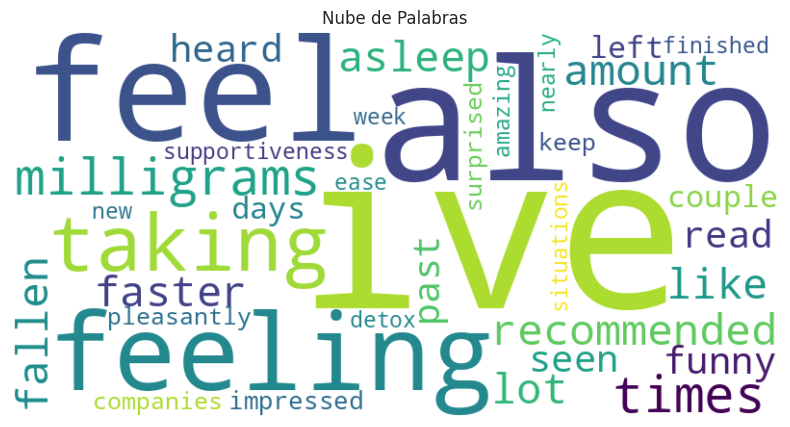

In [82]:
for i in range(2,6):
  crear_barplot(frecuencias[i],feelings[i])

  crear_wordcloud(frecuencias[i])

## **3. Carga o Adquisición de Datos**
---

Agregue el código necesario en _Python_ para obtener o cargar los datos.

### **3.1. Origen de los datos**
---
Cuál es la fuente principal de los datos?

  - Fuente Principal de los Datos: La fuente principal de los datos es un dataset alojado en Hugging Face. Los datos se extraen mediante una solicitud GET a la API de Hugging Face utilizando la siguiente URL: https://datasets-server.huggingface.co/rows?dataset=dair-ai%2Femotion&config=split&split=train&offset=0&length=100. Este endpoint proporciona un subconjunto del dataset dair-ai/emotion, específicamente 100 entradas de la partición de entrenamiento.

¿Existen consideraciones especiales al extraer datos de esta fuente?

  - Consideraciones Especiales: Sí, hay varias consideraciones a tener en cuenta al extraer datos de esta fuente:
      - Limitaciones de la API: La API puede tener límites en la cantidad de datos que se pueden solicitar en una sola consulta, lo cual es evidente en el uso de parámetros como offset y length. Es importante manejar la paginación correctamente si se necesitan más datos.
      - Autenticación y Autorización: Dependiendo del uso y las políticas de Hugging Face, puede ser necesario utilizar tokens de autenticación para acceder a ciertos datasets o para realizar múltiples solicitudes sin restricciones.
      - Formato de los Datos: La respuesta de la API está en formato JSON, lo cual implica que se necesitará procesamiento adicional para convertir estos datos en un formato adecuado para análisis, como un DataFrame de pandas.
      - Tasa de Solicitudes: Para evitar ser bloqueado por realizar demasiadas solicitudes en un corto período de tiempo, se deben respetar las tasas de solicitudes permitidas por la API.

¿Cómo se obtienen los datos del origen a la plataforma de Big Data?

  - Obtención de los Datos: Los datos se obtienen mediante una solicitud HTTP GET utilizando la biblioteca requests en Python. A continuación se transforma la respuesta JSON en un DataFrame de pandas, que es un formato adecuado para el procesamiento y análisis de datos en Python. El proceso general es el siguiente:
      Realizar la Solicitud: Se realiza una solicitud GET a la URL proporcionada utilizando la biblioteca requests.
      Procesar la Respuesta: La respuesta de la solicitud, que está en formato JSON, se procesa y se convierte en un DataFrame de pandas.

¿Se utilizan herramientas específicas?

  - Herramientas Específicas: Sí, se utilizan varias herramientas específicas para manejar este flujo de trabajo:
      - Python y Pandas: Para realizar la solicitud GET, procesar la respuesta JSON y transformar los datos en un DataFrame para análisis.
      Requests: Biblioteca de Python para realizar solicitudes HTTP de manera sencilla.
      - NLP Libraries: Herramientas de procesamiento del lenguaje natural como NLTK o spaCy para análisis de texto y sentimientos.
      - Visualización: Librerías de visualización como Matplotlib, Seaborn y WordCloud para representar gráficamente los resultados del análisis de frecuencias y sentimientos.

In [25]:
# INGRESE SU CÓDIGO

## **Créditos**
---

* **Profesor:** [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*